# Connecting to GoogleDrive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Importing of all required libraries

In [ ]:
from numpy import asarray
from PIL import Image
import numpy as np 
import os
import matplotlib.pyplot as plt
import imageio
import random
import matplotlib.image as mpimg
import cv2
from imblearn.over_sampling import SMOTE

# Image shape

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 100

# Loading of dataset (NumPy arrays)

In [ ]:
X_train = np.load('/content/drive/MyDrive/wildfire/numpy/X_train.npy')
y_train = np.load('/content/drive/MyDrive/wildfire/numpy/y_train.npy')

# Dataset composition



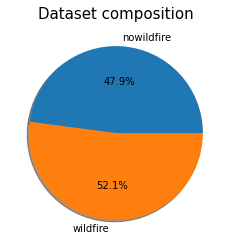

In [ ]:
data = []
label=["nowildfire", "wildfire"]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("Dataset composition", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

### Dataset is imbalanced

In [ ]:
X_train.shape

(30250, 100, 100, 3)

In [ ]:
print(len(X_train))
X_train = X_train.reshape(X_train.shape[0], (X_train[0].shape[0]*X_train[0].shape[1]*X_train[0].shape[2]))

30250


# SMOTE

In [ ]:
train_set_OS = SMOTE()
X_train, y_train = train_set_OS.fit_resample(X_train, y_train)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 3)
print(len(X_train))

31500


In [ ]:
X_train.shape

(31500, 100, 100, 3)

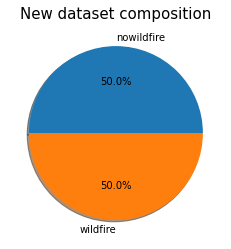

In [ ]:
data = []
label=["nowildfire", "wildfire"]

for classNum in range(len(label)):
  data.append(np.sum(np.array(y_train) == classNum)) 

plt.title("New dataset composition", fontsize=15)
plt.pie(data, labels=label, shadow=True, autopct='%1.1f%%')
plt.show()

### New dataset is balanced

# Saving as NumPy array

In [ ]:
np.save('/content/drive/MyDrive/wildfire/numpy/X_train_balanced.npy', X_train)
np.save('/content/drive/MyDrive/wildfire/numpy/y_train_balanced.npy', y_train)